In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import datetime as dt

%matplotlib inline


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

# En este notbook se encuentra: 

    

tf = pd.read_csv('../../data/events.csv',dtype=object)

# Agregamos nuevas columnas para trabajar mejor con el tiempo. (mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear
tf['timestamp_hour'] = tf['timestamp_datetime'].dt.hour
tf['timestamp_minute'] = tf['timestamp_datetime'].dt.minute

viewed_product = tf[tf['event'] == 'viewed product']
brand_listing    = tf[tf['event'] == 'brand listing']
visited_site =  tf[tf['event'] == 'visited site']
ad_campaign_hit = tf[tf['event'] == 'ad campaign hit']
generic_listing = tf[tf['event'] == 'generic listing']
searched_products = tf[tf['event'] == 'searched products']
search_engine_hit = tf[tf['event'] == 'search engine hit']
checkout = tf[tf['event'] == 'checkout']
staticpage = tf[tf['event'] == 'staticpage']
conversion = tf[tf['event'] == 'conversion']
lead = tf[tf['event'] == 'lead']

Text(0.5,0,'Día del año')

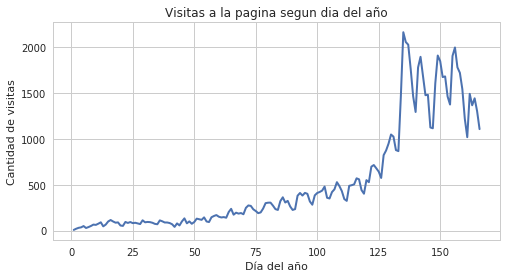

In [8]:
# Visitas a productos segun dia del año
visitas_segun_dia_año = visited_site.groupby('timestamp_dayofyear').count()['event'].plot(linewidth=2,figsize=(8,4))
visitas_segun_dia_año.set_title("Visitas a la pagina segun dia del año")
visitas_segun_dia_año.set_ylabel('Cantidad de visitas')
visitas_segun_dia_año.set_xlabel('Día del año')

In [12]:
visitas_prod_mes_dia = visited_site.groupby(['timestamp_month','timestamp_day']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_month',columns = 'timestamp_day',values = 'event')
visitas_prod_mes_dia

timestamp_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
timestamp_month,,,,,,,,,,,,,,,,,,,,,
1,7.00,20.00,30.00,35.00,49.00,28.00,38.00,50.00,65.00,62.00,...,94.00,83.00,93.00,81.00,85.00,78.00,71.00,112.00,90.00,94.00
2,92.00,85.00,73.00,69.00,111.00,101.00,88.00,88.00,82.00,69.00,...,117.00,144.00,99.00,93.00,145.00,159.00,169.00,nan,nan,nan
3,151.00,143.00,147.00,140.00,202.00,237.00,173.00,195.00,185.00,191.00,...,305.00,272.00,234.00,225.00,321.00,363.00,306.00,324.00,263.00,225.00
4,234.00,380.00,410.00,382.00,411.00,401.00,318.00,282.00,384.00,410.00,...,324.00,488.00,495.00,504.00,570.00,559.00,442.00,402.00,550.00,nan
5,528.00,697.00,715.00,680.00,643.00,574.00,823.00,874.00,949.00,"1,048.00",...,"1,896.00","1,685.00","1,477.00","1,481.00","1,125.00","1,116.00","1,606.00","1,910.00","1,848.00","1,675.00"
6,"1,682.00","1,463.00","1,375.00","1,905.00","1,998.00","1,781.00","1,721.00","1,543.00","1,220.00","1,019.00",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(33,0.5,'Mes de la visita')

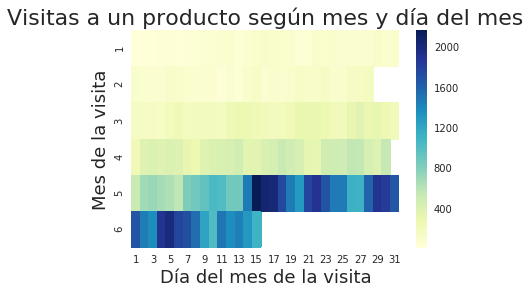

In [13]:
visitas_prod_mes_dia = sns.heatmap(visitas_prod_mes_dia,  cmap="YlGnBu")
visitas_prod_mes_dia.set_title("Visitas a un producto según mes y día del mes", fontsize=22)
visitas_prod_mes_dia.set_xlabel("Día del mes de la visita",fontsize=18)
visitas_prod_mes_dia.set_ylabel("Mes de la visita", fontsize=18)

In [ ]:
# Vemos las visitas a un producto segun dia de la semana y mes.
visitas_prod_mes_dia_semana = viewed_product.groupby(['timestamp_month','timestamp_weekday']).agg({'event':'count'})\
                .pivot_table(index = 'timestamp_weekday',columns = 'timestamp_month',values = 'event')
visitas_prod_mes_dia_semana

In [ ]:
visitas_prod_mes_dia_semana = sns.heatmap(visitas_prod_mes_dia_semana,  cmap="YlGnBu")
visitas_prod_mes_dia_semana.set_title("Visitas a un producto según mes y día de la semana", fontsize=22)
visitas_prod_mes_dia_semana.set_xlabel("Mes de la visita",fontsize=18)
visitas_prod_mes_dia_semana.set_ylabel("Día de la visita", fontsize=18)

Text(0.5,1,'CONVERSION')

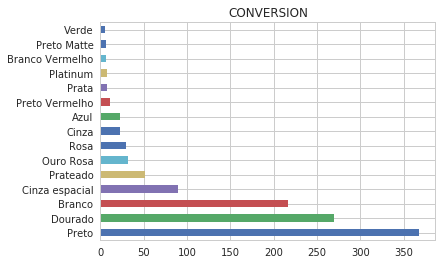

In [16]:
conversion_color = conversion.color.value_counts().head(15).plot(kind = 'barh').set_title('CONVERSION')
conversion_color

In [19]:
conversion.color.value_counts()

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Branco Vermelho      6
Preto Matte          6
Verde                5
Ametista             4
Titânio              4
Ouro                 4
Preto Brilhante      3
Indigo               3
Cabernet             2
Bambu                2
Vermelho             2
Amarelo              2
Azul Topázio         1
Preto Azul           1
Couro Vintage        1
Name: color, dtype: int64

In [18]:
conversion.color.value_counts(normalize = True)

Preto                             0.31
Dourado                           0.23
Branco                            0.18
Cinza espacial                    0.08
Prateado                          0.04
Ouro Rosa                         0.03
Rosa                              0.03
Cinza                             0.02
Azul                              0.02
Preto Vermelho                    0.01
Prata                             0.01
Platinum                          0.01
Branco Vermelho                   0.01
Preto Matte                       0.01
Verde                             0.00
Ametista                          0.00
Titânio                           0.00
Ouro                              0.00
Preto Brilhante                   0.00
Indigo                            0.00
Cabernet                          0.00
Bambu                             0.00
Vermelho                          0.00
Amarelo                           0.00
Azul Topázio                      0.00
Preto Azul               